In [18]:
#l-17
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Google_Stock_Test (2023).csv')
from pmdarima import auto_arima

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
#converting all dates into datetime format

In [6]:
#calculating moving average(100 days)
day = 100
data["100-day Moving Average"] = data['Close'].rolling(window=day).mean()
#This means we are going to get  data of last 100 days

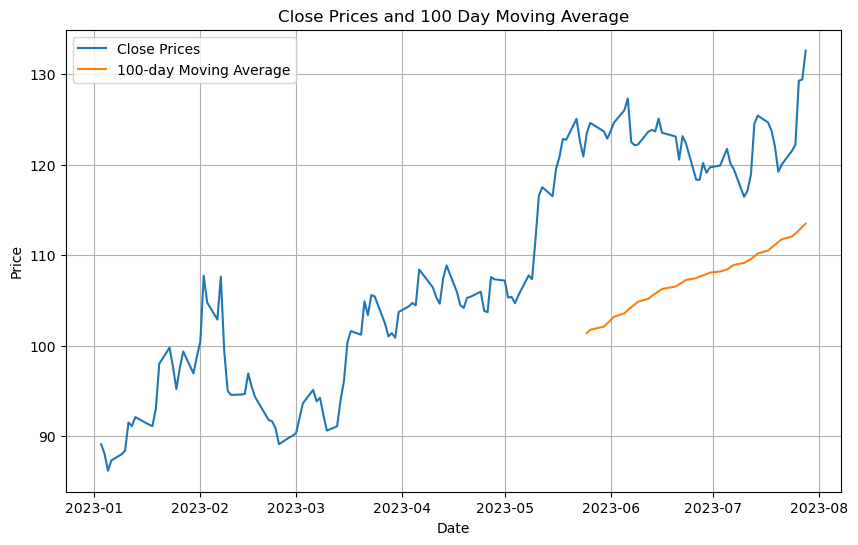

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data["Date"],data['Close'],label='Close Prices')
plt.plot(data["Date"],data['100-day Moving Average'],label='100-day Moving Average')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Close Prices and 100 Day Moving Average")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#l-18 Analysing volatility
# we are going to calculate 20 day rolling standard deviations of price changes


In [8]:
day=20
data['Price Change'] = data['Close'] - data['Open']
data["Volatility"] = data['Price Change'].rolling(window=day).std()

In [9]:
data['Rolling mean'] = data['Close'].rolling(window=day).mean()

In [10]:
#we will calculate upper and lower bollinger bands,it is used to calculate volatility
data['Upper'] = data['Rolling mean']+2*data["Volatility"]
data['Lower'] = data['Rolling mean']-2*data["Volatility"]

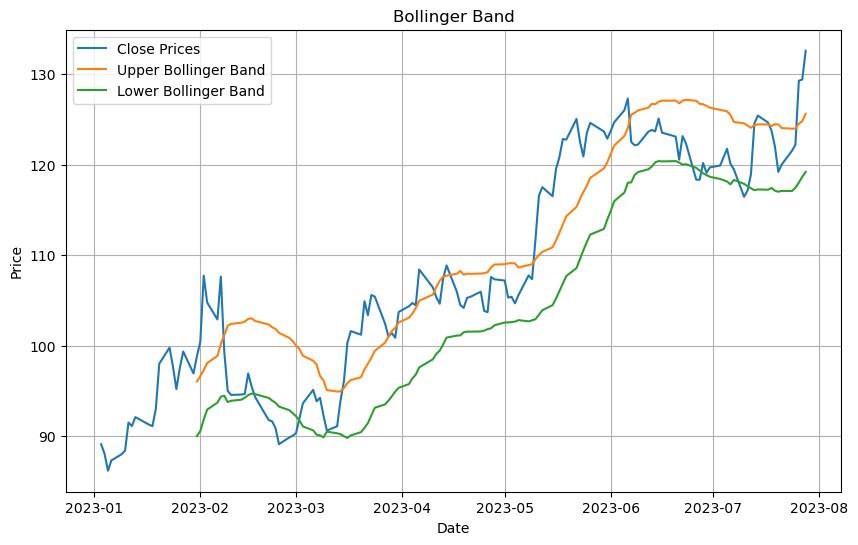

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data["Date"],data['Close'],label='Close Prices')
plt.plot(data["Date"],data['Upper'],label='Upper Bollinger Band')
plt.plot(data["Date"],data['Lower'],label='Lower Bollinger Band')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bollinger Band")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#since there is huge difference between orange and green line. this implies that market is volatile

In [ ]:
#L19  Autocorrelation functions and partial Autocorrelation functions

In [ ]:
# arima has 3 parameters (p,d,q)
# p = represents the order or the autoregressive order like no. of observations
# d= represents differentiating order like the no. of times the observations are different
# q represents the moving average order . its the size of moving average window to captuer moving average relationship
# to get all the values , we need to do ACF and PACF analysis

In [12]:
data = pd.read_csv('Google_Stock_Train (2010-2022).csv')

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
#converting all dates into datetime format

In [15]:
data.set_index('Date', inplace=True)#to set date column as index

In [17]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 581.0 kB/s eta 0:00:01
   ------------ ------------------------- 194.6/614.7 kB 985.7 kB/s eta 0:00:01
   ------------------------- -------------- 389.1/614.7 kB 1.6 MB/s eta 0:00:01
   -------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [19]:
model = auto_arima(data['Close'],seasonal = False, stepwise = True, suppress_warning =True,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=634.587, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=636.091, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=636.014, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=635.240, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.581 seconds


In [21]:
p,d,q = model.order
print(f'Optimal P value: {p},d value: {d},q value: {q}')

Optimal P value: 0,d value: 1,q value: 0


# L-20 Arima Forecasting and residual analysis

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [31]:
data = pd.read_csv('Google_Stock_Train (2010-2022).csv')

In [32]:
data['Date'] = pd.to_datetime(data['Date'])
#converting all dates into datetime format

In [33]:
data.set_index('Date', inplace=True)#to set date column as index

In [34]:
p=1
d=1
q=1
model = ARIMA(data["Close"], order=(p,d,q))
results = model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
# Forecasting future prices
forecast_steps = 3# we need to predict values for next 3 time periods
#forcast contains forecasted values of specific number of steps i.e. 3 steps
#stderr represents standard error associated with forecasted values. It gives an indication of the uncertainity or variability of the forecast  
#conf_int contains confidence intervals for the forecasted values
forecast,stderr,conf_int = results.forecast(steps=forecast_steps)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
print("Forecasted Future Stock Price" + " " + str(forecast))

Forecasted Future Stock Price 88.24669015208664


In [ ]:
#Residual analysis is a technique used to assess a regression model's validity by examining the differences between observed values and predicted values by the model.

In [38]:
residuals = data['Close'] = results.fittedvalues

ACF Plot for Residuals
PACF Plot for Residuals


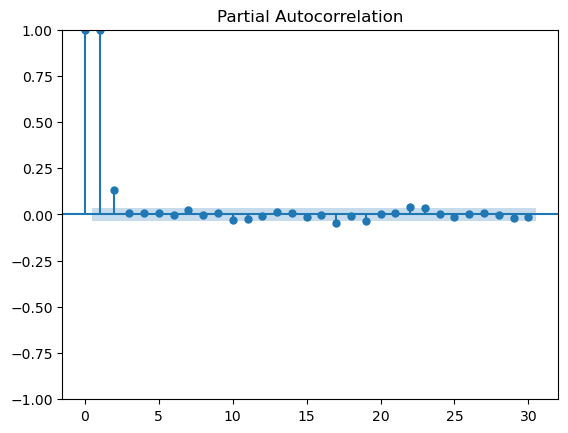

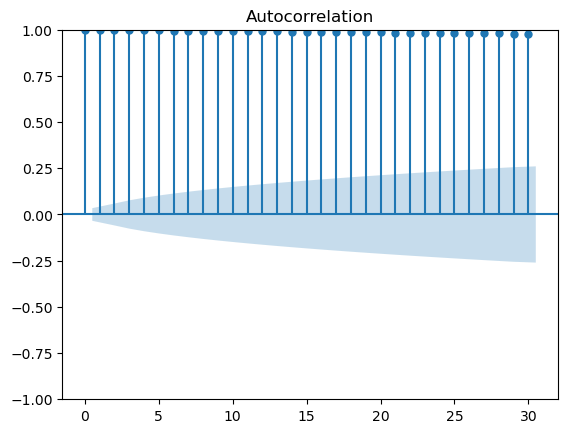

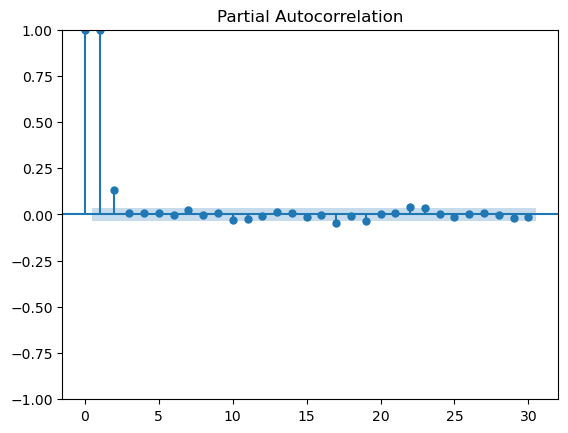

In [39]:
print("ACF Plot for Residuals")
plot_acf(residuals,lags = 30)
print("PACF Plot for Residuals")
plot_pacf(residuals,lags = 30)

In [ ]:
#if dots on ACF and Pacf plots are near 0, it indicates that the residuals or differences between actual and predicted values have low auto correlation
#it means model is pretty accurate
# check autocorrelation graph

In [ ]:
# l 21


In [40]:
actualdata = data['Close'].iloc[-forecast_steps:]

In [41]:
import numpy as np

In [45]:
mae = np.mean(np.abs(actualdata-forecast))

In [46]:
mse = np.mean((actualdata-forecast)**2)

In [47]:
rmse = np.sqrt(mse)

In [48]:
print("MAE " + str(mae) )
print("MSE " + str(mse) )
print("RMSE " + str(rmse) )

MAE 0.9968549920261154
MSE 1.5983567060287998
RMSE 1.2642613282184976


In [ ]:
#lower values are better for all 3
#all are close to 0, So it is a good indication